## Why EDA?
- To understand how much missing data there is in the Dataset
- To get an idea of wheather features need further cleaning
- It may turn out that the problem doesn't require ML at all, i.e. a variable accurately predicts the target
- Visualization helps us: 
    - Get a range of of values each feature takes
    - We can immediately see any outliers that are different from the rest which indicates _missing_ data or _noise_
    - It could also give us an idea of how well a ML Algorithm will do in predicting for example for a classification problem, the datapoint visualation will show us how well separated the different types of objects are. 

In [2]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
cancer_data = datasets.load_breast_cancer()
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
# Features and target
print('features:{}'.format(cancer_data.feature_names))
print('target:{}'.format(cancer_data.target_names))

features:['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target:['malignant' 'benign']


In [9]:
# Sample features and target
print(cancer_data.data[:5])
print(cancer_data.target[:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [8]:
cancer_df = pd.DataFrame.from_records(cancer_data.data, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_data.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
cancer_df.query('target == 1').head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [14]:
print('shape of dataset:{}'.format(cancer_df.shape))

shape of dataset:(569, 31)


In [19]:
from sklearn.model_selection import train_test_split

feature_list = list(cancer_data.feature_names)
x_train, x_test, y_train, y_test = train_test_split(cancer_df[feature_list], cancer_df['target'])

## Feature pair plot
Plot of all possible pairs of features and produces a scatter plot for each pair showing how the features are correlated to each other or not.

_Each point on the plot represents the target value, colored according to its class and positioned using the feature assigned to the scatter plot_

Along the diagnol is the histogram showing the distribution of feature values for that feature

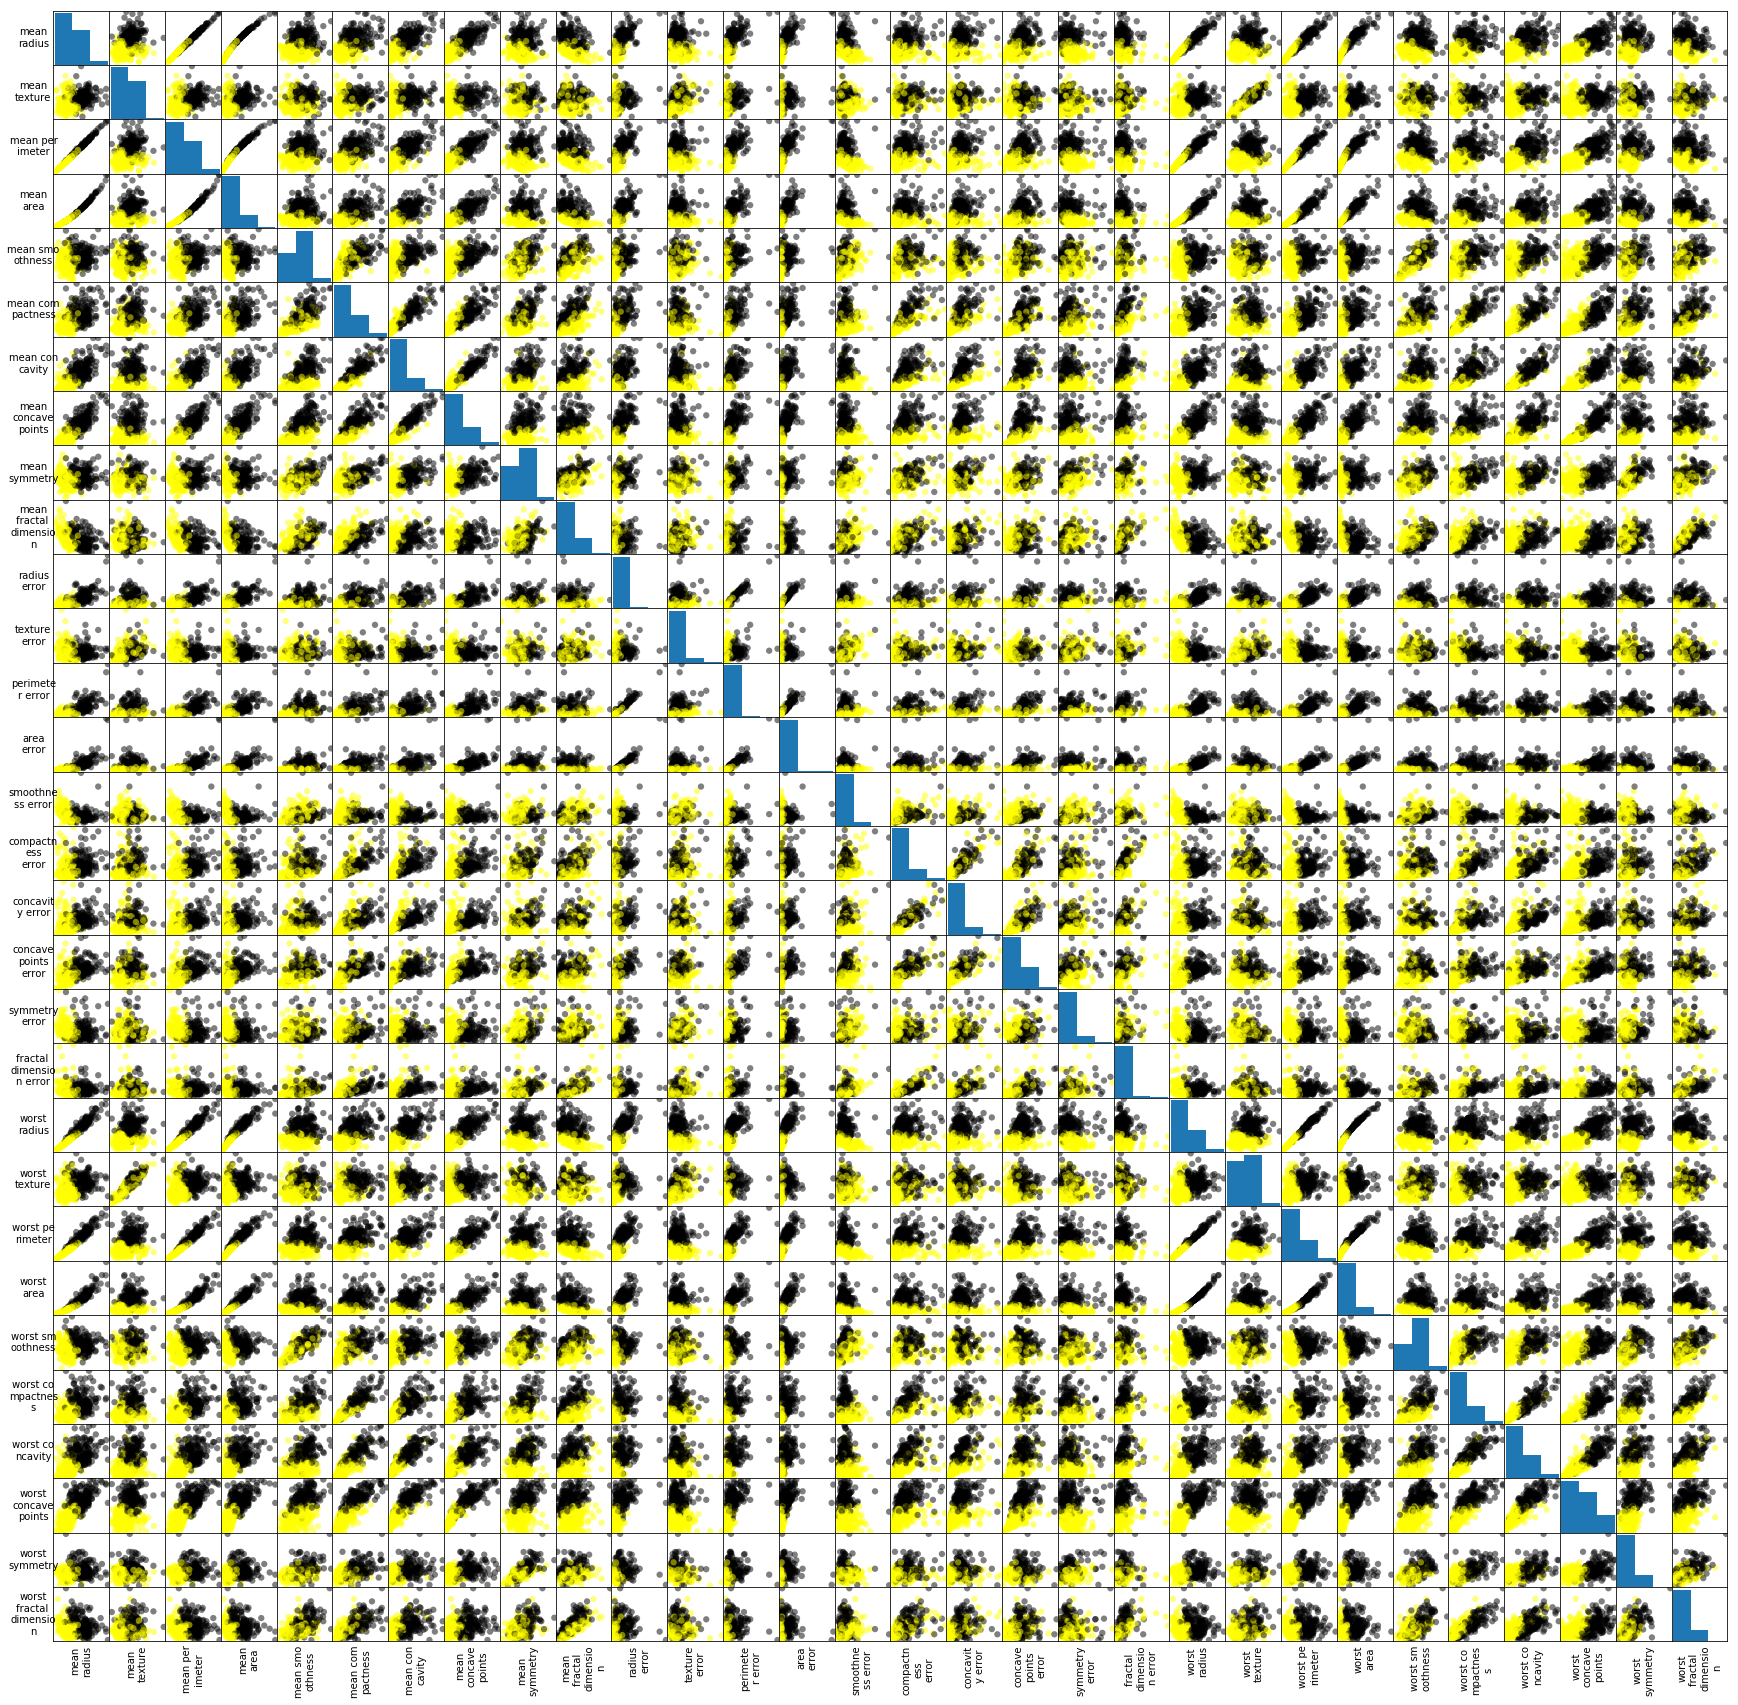

In [36]:
from matplotlib import cm
import textwrap
# we have 30 features, we should stagger the x, y tick names so that they can be read better

# pd.tools.plotting.scatter_matrix returns an array of the axes it draws; 
# The lower left boundary axes corresponds to indices [:,0] and [-1,:]. 
# One can loop over these elements and apply any sort of modifications.

# Function to wrap text for longer labels 
def wrap(label, width=8):
    '''wrap text if longer than width'''
    return '\n'.join(textwrap.wrap(label, width))

# use kwargs (keyword args) to pass in config to the plot
plot_kwargs = {'marker': 'o', 's': 40, 'figsize': (30, 30)}

# use the gnuplot or gnuplot2 color map
cmap = cm.get_cmap('gnuplot')
# plot histogram on the diagnol with bin size of 3
scatter_axes = pd.plotting.scatter_matrix(x_train, c=y_train, hist_kwds={'bins': 3}, cmap=cmap, **plot_kwargs)

for ax in scatter_axes[:, 0]: # the left boundry
    ax.grid(False, axis='both')
    ax.set_ylabel(wrap(ax.get_ylabel()), rotation=0, va='center', labelpad=10)
    ax.set_yticks([])
    
for ax in scatter_axes[-1,:]: # bottom boundry
    ax.grid(False, axis='both')
    ax.set_xlabel(wrap(ax.get_xlabel()), rotation=90)
    ax.set_xticks([])
    

**Histogram shows the distribution of values within the feature**

Upper left corner shows the histogram distribution of mean radius for all samples in the training set

**Each plot show interaction between features corresponding outcome of benign or tumorous**

By observing the plots, we can easily see that most pairs of features are suitable for separating the two target classes. A classifier built using these features would do reasonably well. 

## 3-D Plot

We can look at features that use a subset of 3 features by creating a 3 dimensional plot. Lets use mean radius, mean smoothness and worst concave points seem to see if we can find clusters of benign and tumorous observations

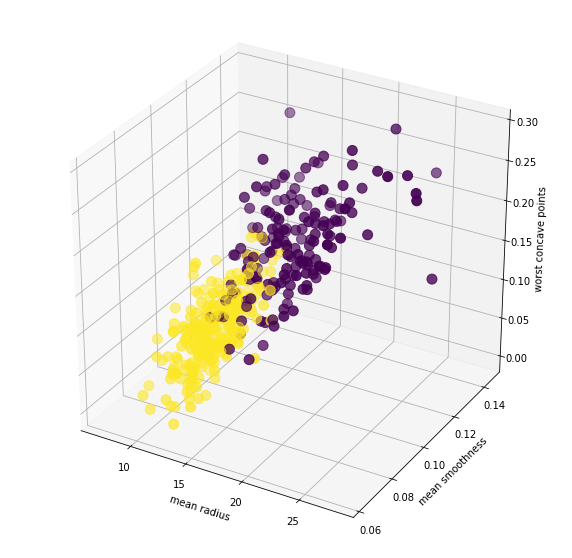

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# plot_kwargs


fig = plt.figure(figsize=(10,10)) # empty figure with no axis
ax = fig.add_subplot(111, projection='3d') # get axis
# create a scatter plot on the same axis
ax.scatter(x_train['mean radius'], x_train['mean smoothness'], x_train['worst concave points'], c=y_train, marker='o', s=100)
ax.set_xlabel('mean radius')
ax.set_ylabel('mean smoothness')
ax.set_zlabel('worst concave points')
plt.show()

**Each point on the 3d plot represent a target of benign or cancerous**

The cancerous/begnin points are in clearly defined clusters and they are separted in the feature space.